In [1]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# %matplotlib is a magic function in IPython.

df = sns.load_dataset("diamonds")
diamonds = sns.load_dataset("diamonds")
tips = sns.load_dataset("tips")
penguins = sns.load_dataset("penguins")
flights = sns.load_dataset("flights")

df.shape

(53940, 10)

In [2]:
# sns.get_dataset_names()

# Matplotlib to Pandas to Seaborn

In [3]:
# NOTICE: One y value per X value

x = [
    "Ideal",
    "Premium",
    "Very Good",
    "Good",
    "Fair",
]
y = [3457, 4584, 3981, 3928, 4358]

In [4]:
type(x)

list

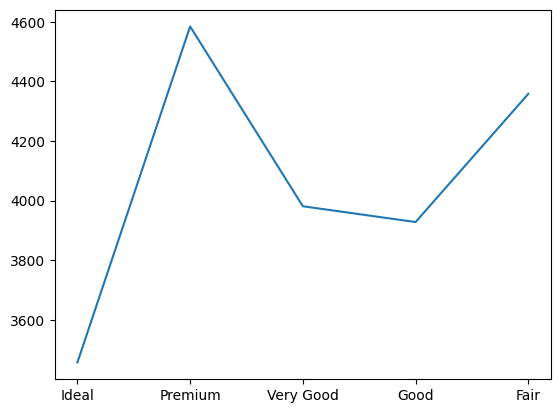

In [5]:
# Matplotlib
plt.plot(x, y)
plt.show()

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


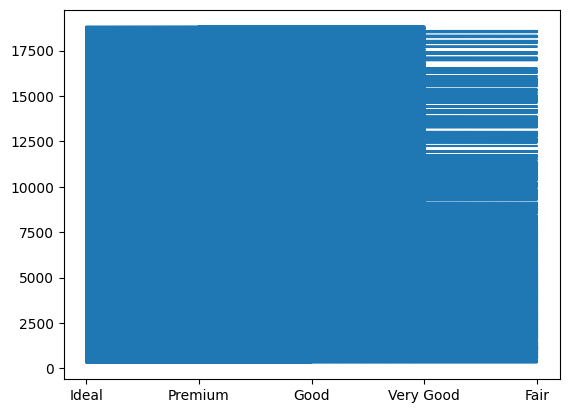

In [7]:
# This works but data is not aggregated
plt.plot(df.cut, df.price)
plt.show()

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [10]:
df2 = df.groupby("cut")["price"].mean().reset_index()  # creating a smaller dataset
df2

,cut,price
0,Ideal,3457.541970
1,Premium,4584.257704
2,Very Good,3981.759891
3,Good,3928.864452
4,Fair,4358.757764


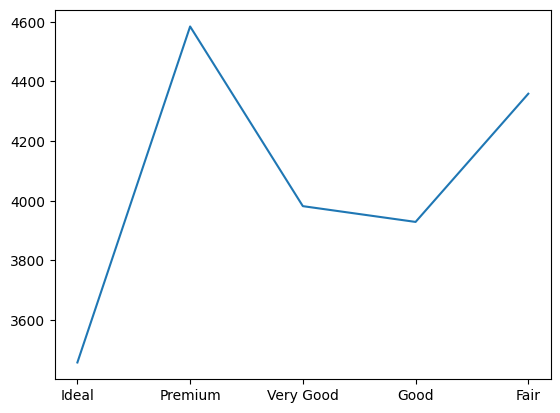

In [11]:
plt.plot(df2.cut, df2.price)
plt.show()

### Below ...
**pandas** ploting functions (e.g., .plot) uses matplotlib

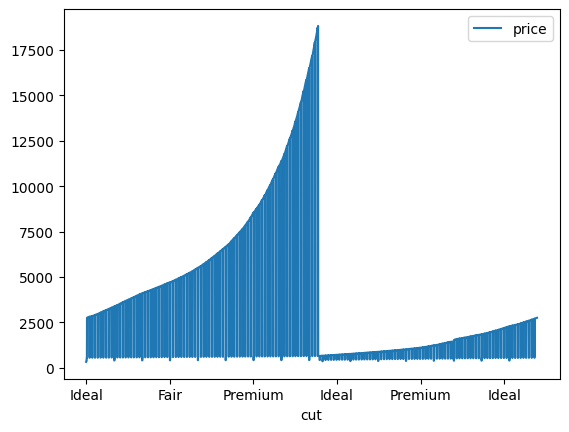

In [12]:
# This is a pandas plot of the raw data (df)
df.plot(x="cut", y="price")
# df2.plot(x='cut', y = 'price')
plt.show()

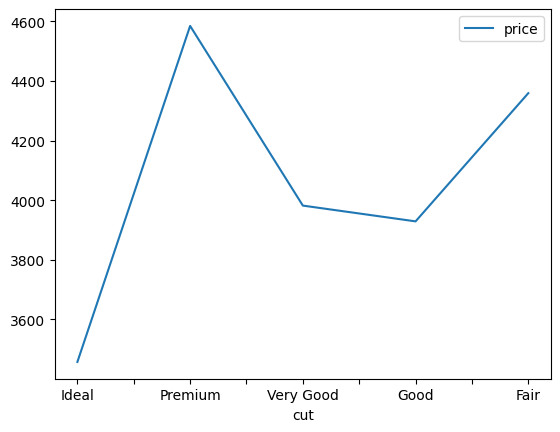

In [13]:
df2.plot("cut", "price")
plt.show()

## Use seaborn

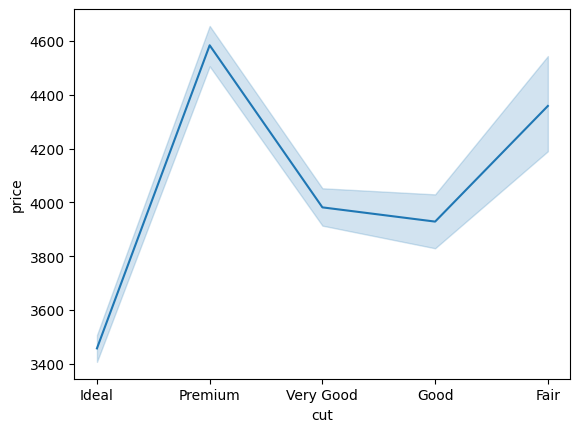

In [14]:
# This is a seaborn plot of df (not grouped) - automatic aggregation
sns.lineplot(data=df, x="cut", y="price")
plt.show()

In [15]:
# Using seaborn's set_theme method
# Seaborn is updating Matplotlib's rc parameters.  rc params are the default style settings
# rc = runtime configuration.
# https://matplotlib.org/stable/tutorials/introductory/customizing.html

sns.set_theme()

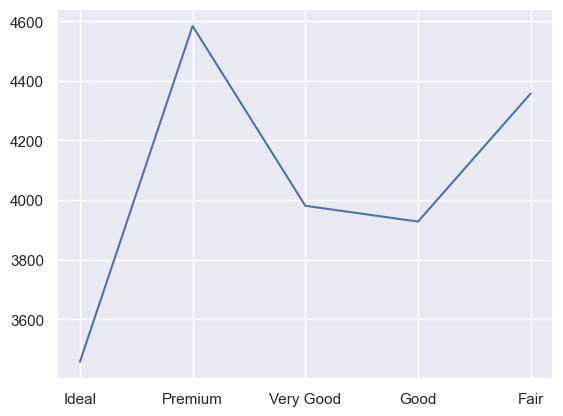

In [16]:
# Matplotlib
plt.plot(x, y)
plt.show()

# Seaborn

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and **statistical aggregation** to produce informative plots.

The **declarative** API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.



## Figure & Axes Level Plotting Functions

 <img src="https://drive.google.com/uc?id=1Lcc0xVij3hfy2QVjUBPln5O8pXAnk8Ef" width=600 />

#### http://seaborn.pydata.org/tutorial.html

## What's the difference between figure and axes level options?

Axes-level functions make self-contained plots
The axes-level functions are written to act like drop-in replacements for matplotlib functions. While they add axis labels and legends automatically, they don’t modify anything beyond the axes that they are drawn into. That means they can be composed into arbitrarily-complex matplotlib figures with predictable results.

In [17]:
%matplotlib inline

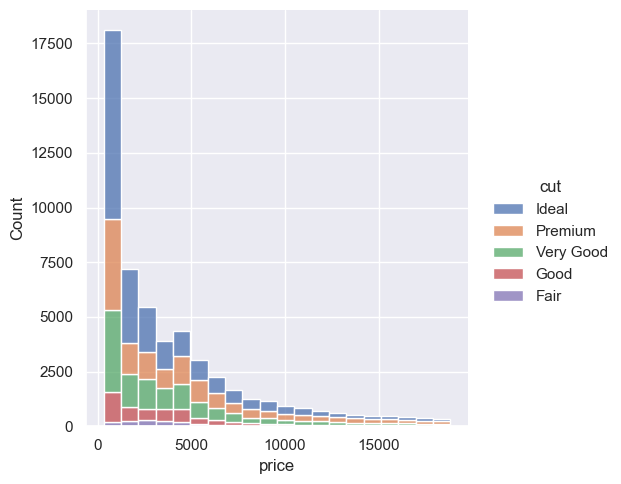

In [18]:
# Figure level
sns.displot(data=df, x="price", hue="cut", multiple="stack", kind="hist", bins=20)
# sns.displot( data=df, x="price", hue="cut", multiple = 'stack')
plt.show()

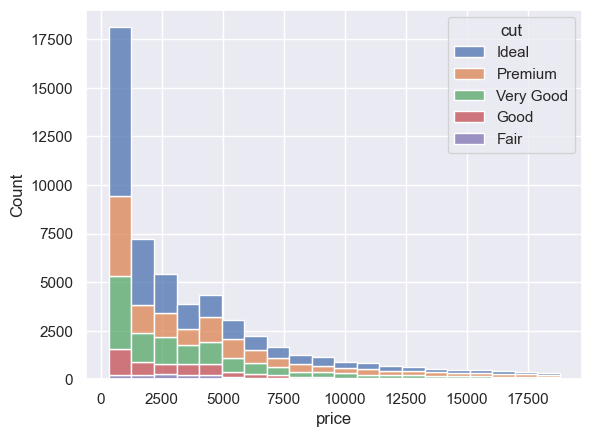

In [19]:
# Axes level
sns.histplot(data=df, x="price", hue="cut", multiple="stack", bins=20)
plt.show()

## Using sns and matplotlib together

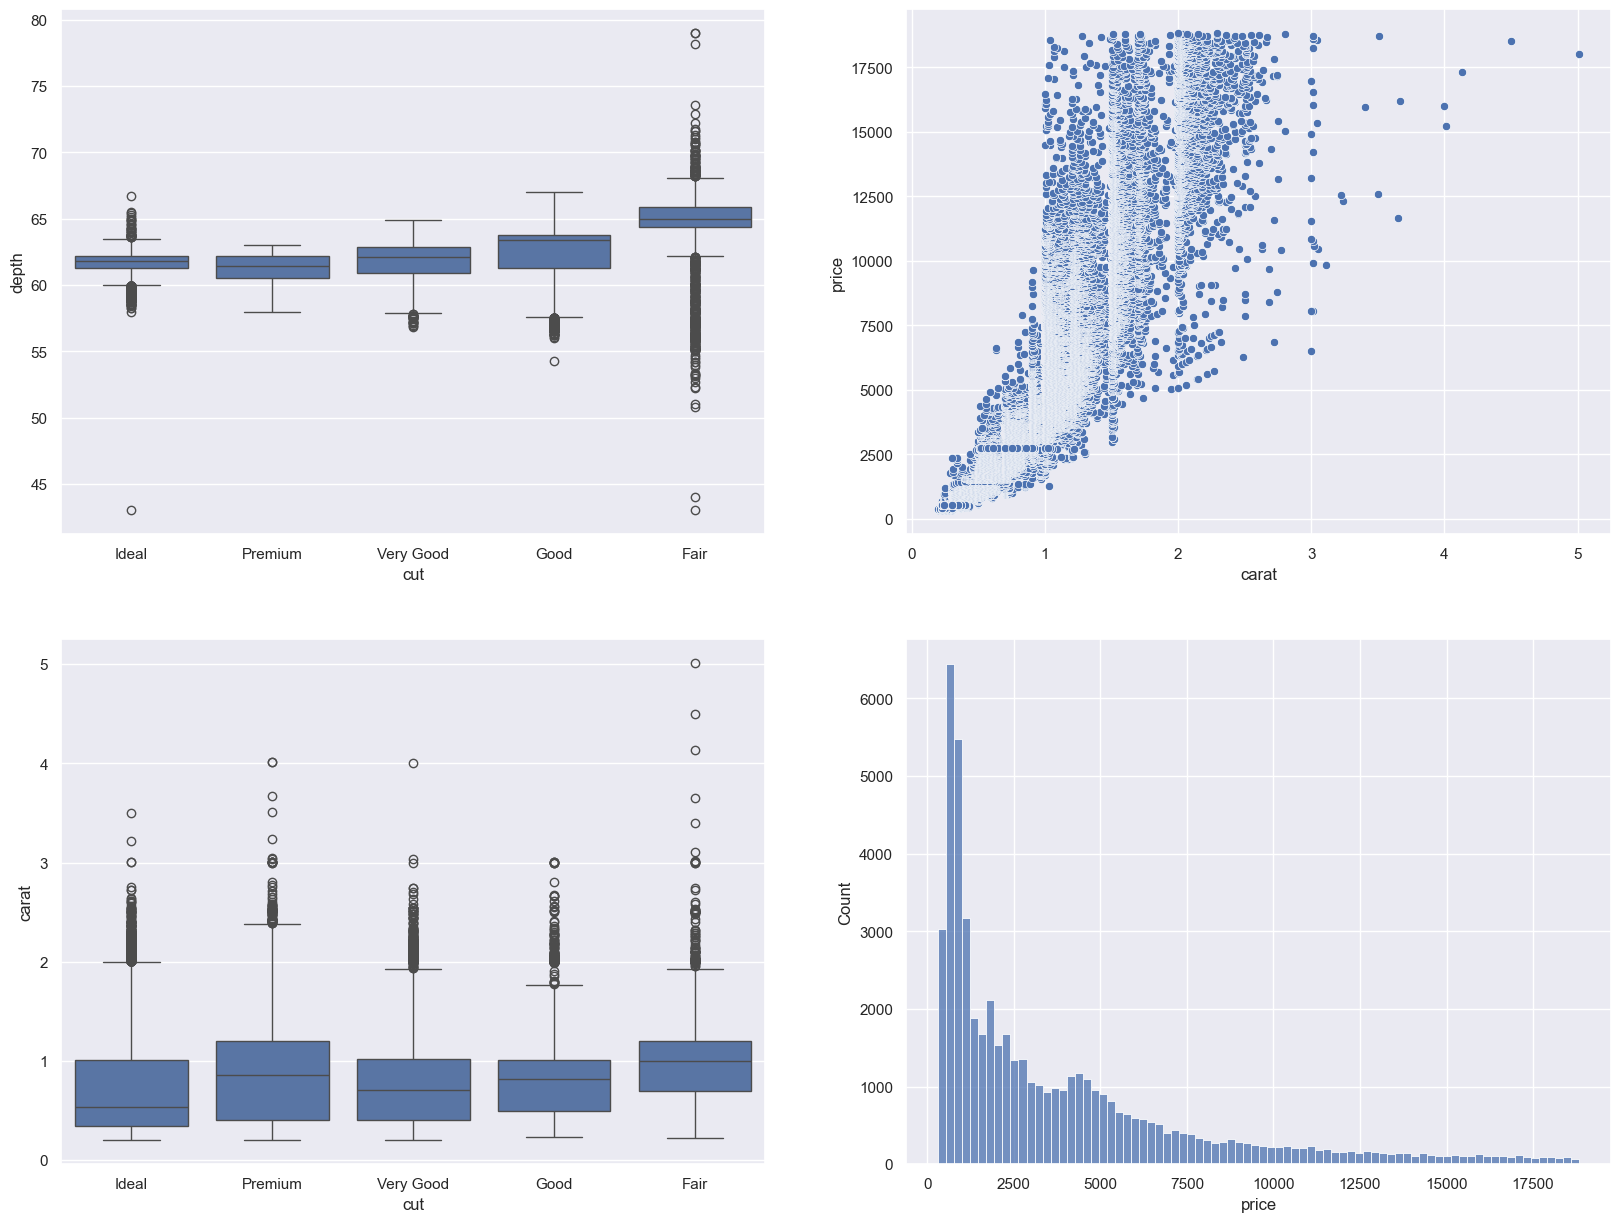

In [20]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.boxplot(y="depth", x="cut", data=df)
plt.subplot(2, 2, 2)
sns.scatterplot(y="price", x="carat", data=df)
plt.subplot(2, 2, 3)
sns.boxplot(y="carat", x="cut", data=df)
plt.subplot(2, 2, 4)
sns.histplot(x="price", data=df)
plt.show()

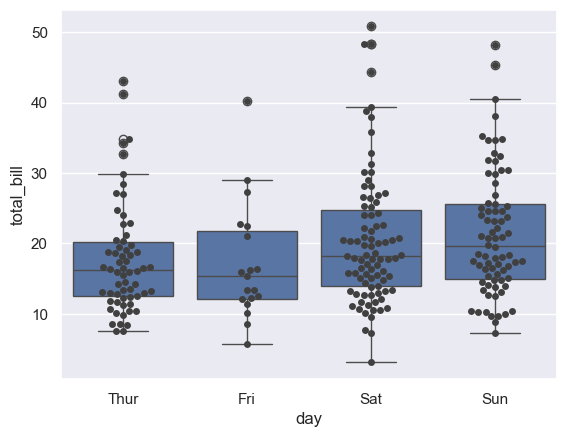

In [21]:
# From Seaborn docuentation
ax = sns.boxplot(x="day", y="total_bill", data=tips)
ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")
plt.show()

## Figure level

- Figure-level functions interface with matplotlib through a seaborn object, usually a FacetGrid
- Each module (relational, distributions, categorical) has a single figure-level function


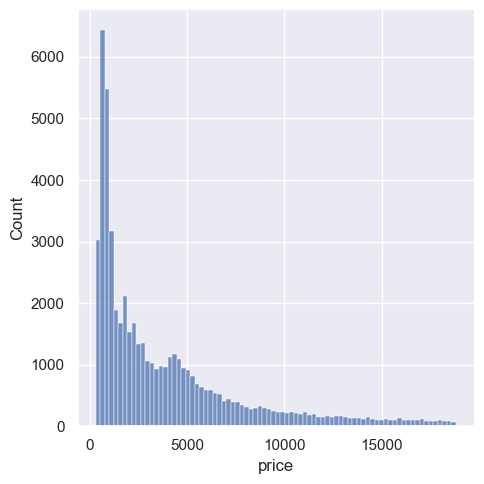

In [22]:
# The default for distplot is a histogram

sns.displot(data=df, x="price")
plt.savefig("save_as_a_png.png")

# sns.displot(data=df, x="price",height=8, aspect=15/8)  Use height and aspect to change the size of the figure.

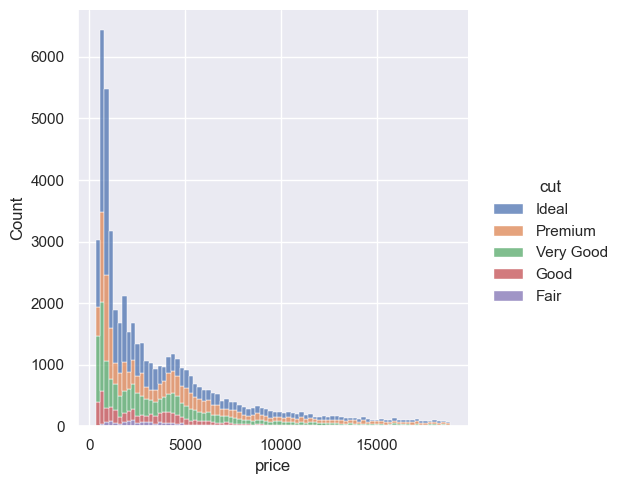

In [23]:
sns.displot(data=df, x="price", hue="cut", multiple="stack")
plt.show()

## Change the plot type with kind = ...

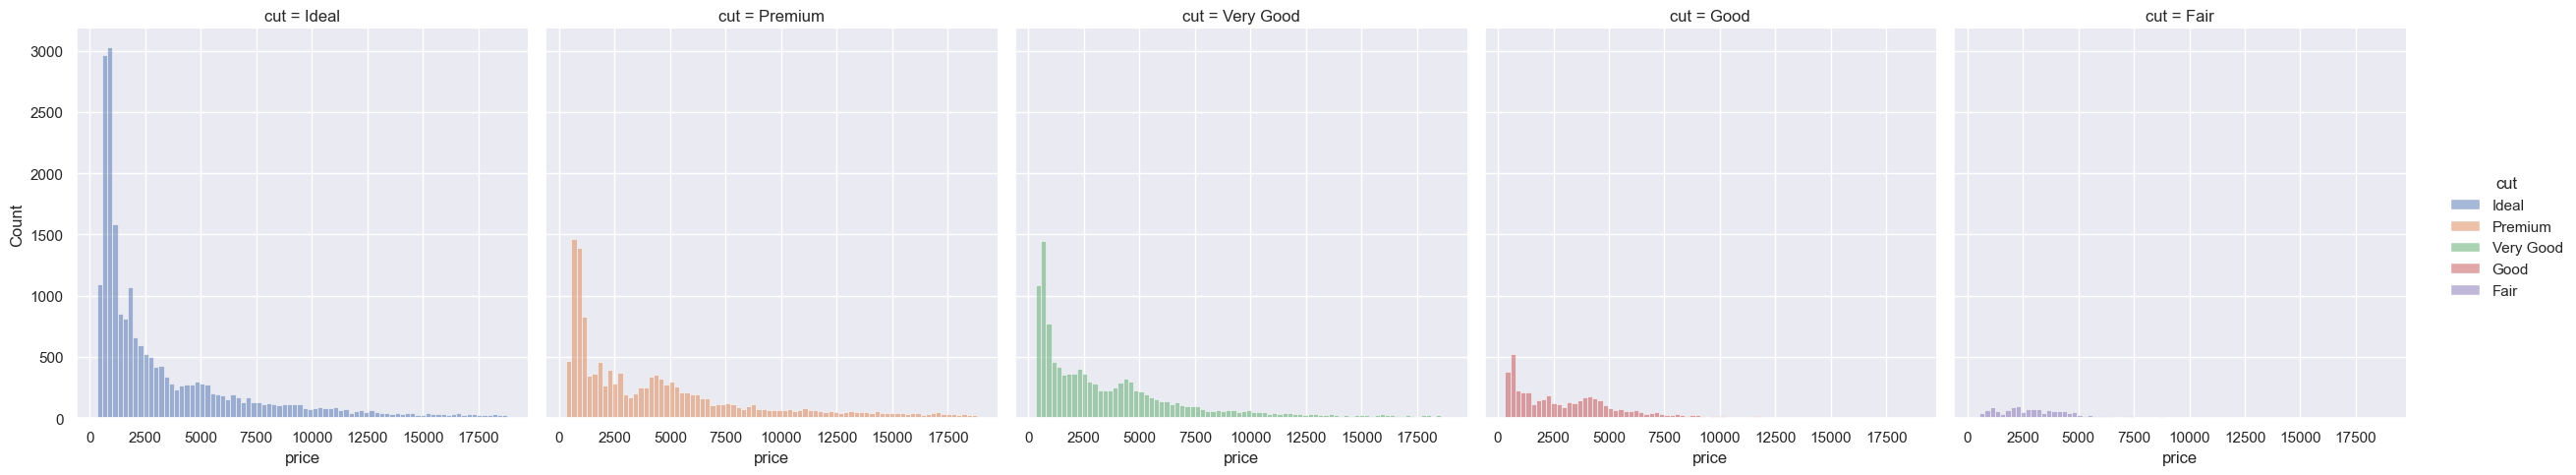

In [24]:
sns.displot(data=df, x="price", hue="cut", col="cut", kind="hist")
plt.show()

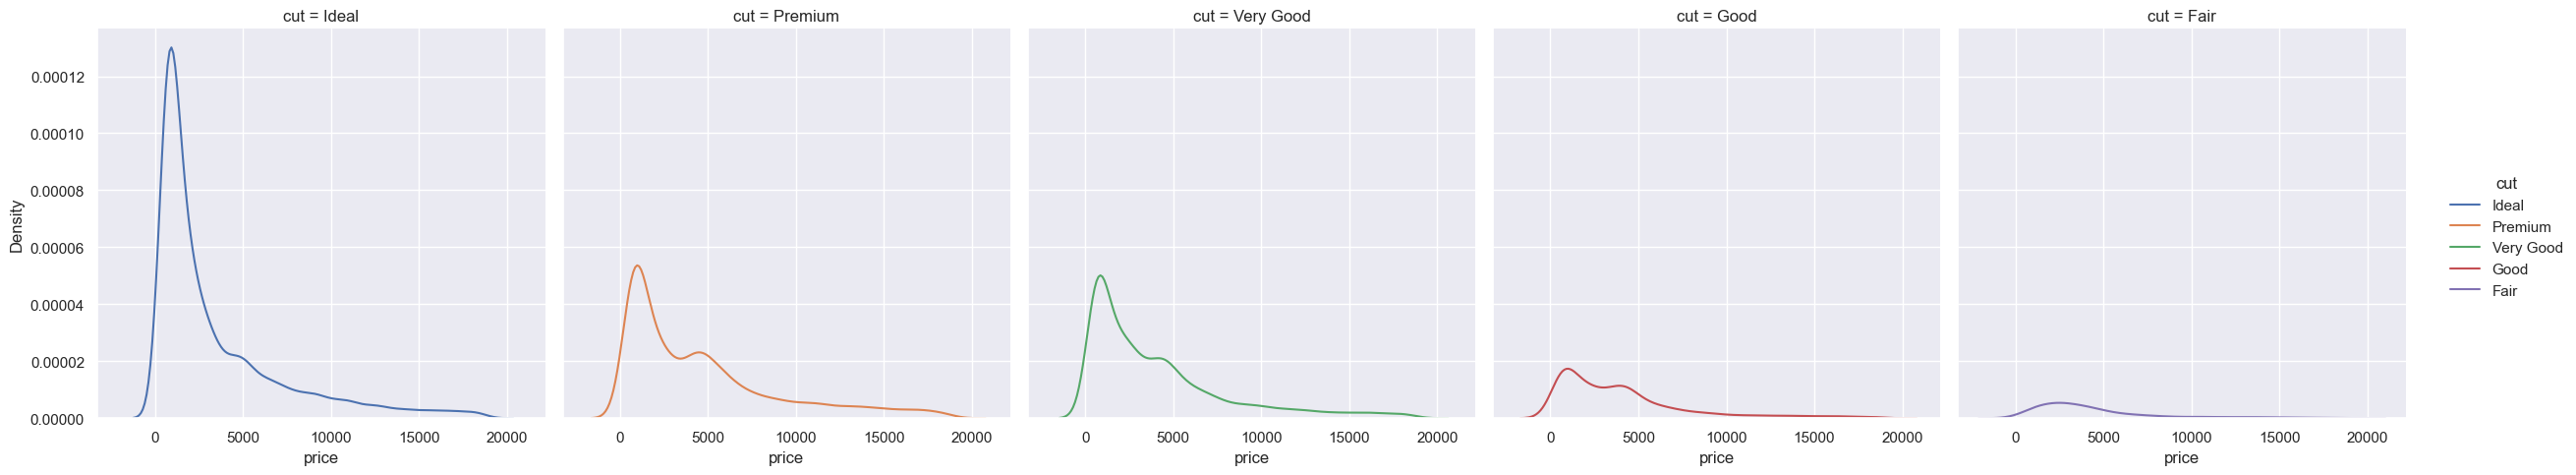

In [25]:
sns.displot(data=df, x="price", hue="cut", col="cut", kind="kde")
plt.show()

# kernel density estimation

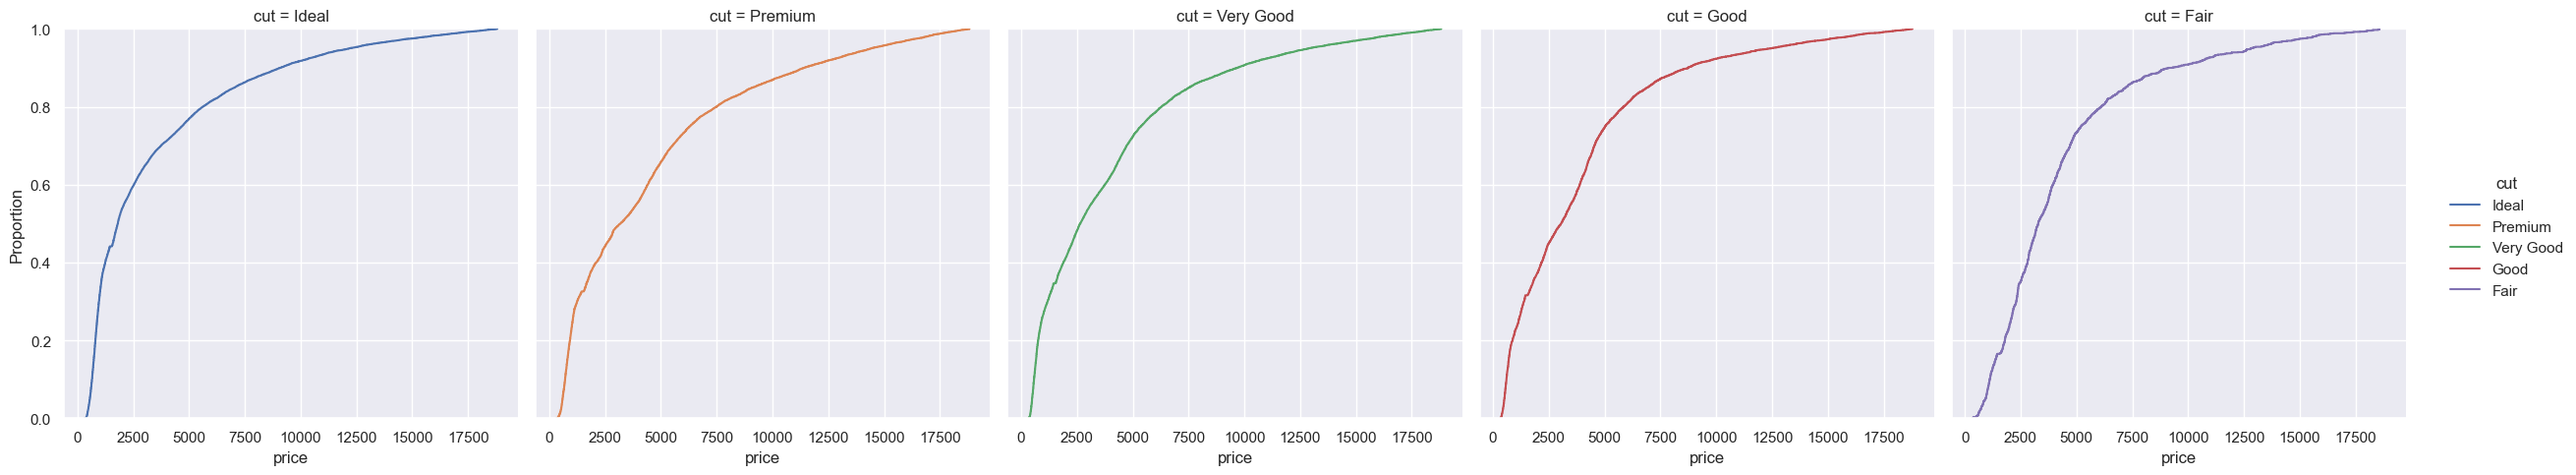

In [26]:
sns.displot(data=df, x="price", hue="cut", col="cut", kind="ecdf")
plt.show()

# empirical cumulative distribution functions

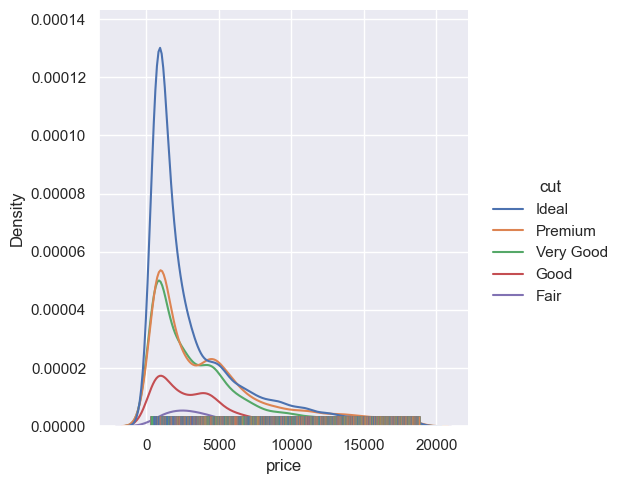

In [27]:
sns.displot(data=df, x="price", hue="cut", kind="kde", rug=True)
plt.show()

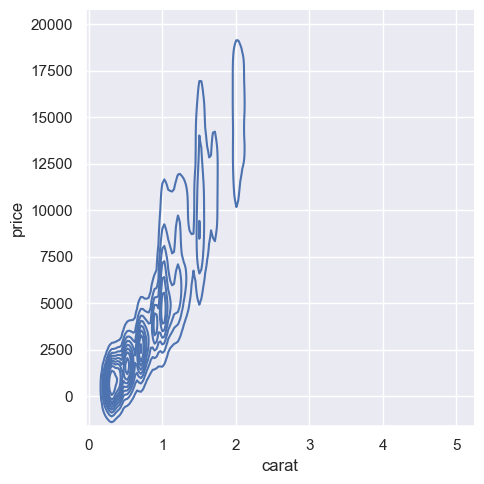

In [28]:
# This one might take a minute to run.

sns.displot(data=df, x="carat", y="price", kind="kde")
plt.show()

## Seaborn Exercise 1 - 10 minutes

- Use the relational (relplot) figure-level function to create two charts.  First a scatterplot and second a line chart.
- Use the 'tips' data set.
- For the scatterplot, determine if tips increasewith the bill amount.  Try to show a distinction between data points based on time of day.
- For the line chart, show how tips change based on size of the party.


In [29]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


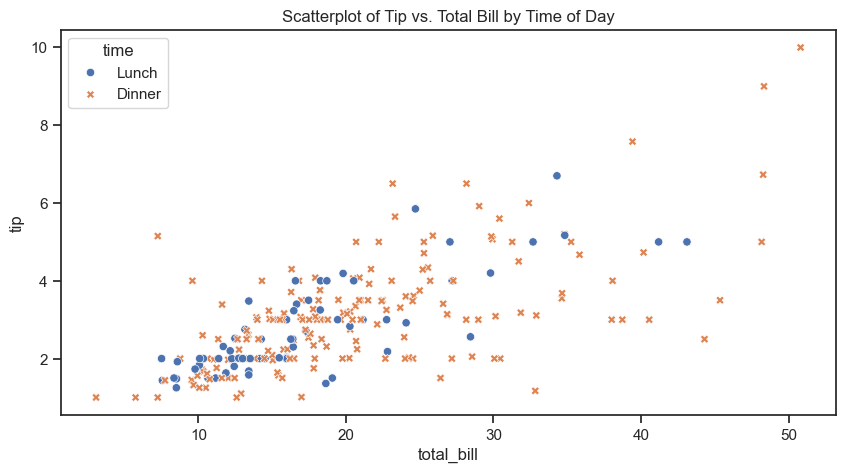

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset
tips = sns.load_dataset("tips")

# Scatterplot: Tips vs. Total Bill, differentiated by time of day
plt.figure(figsize=(10, 5))
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", style="time")
plt.title("Scatterplot of Tip vs. Total Bill by Time of Day")
plt.show()

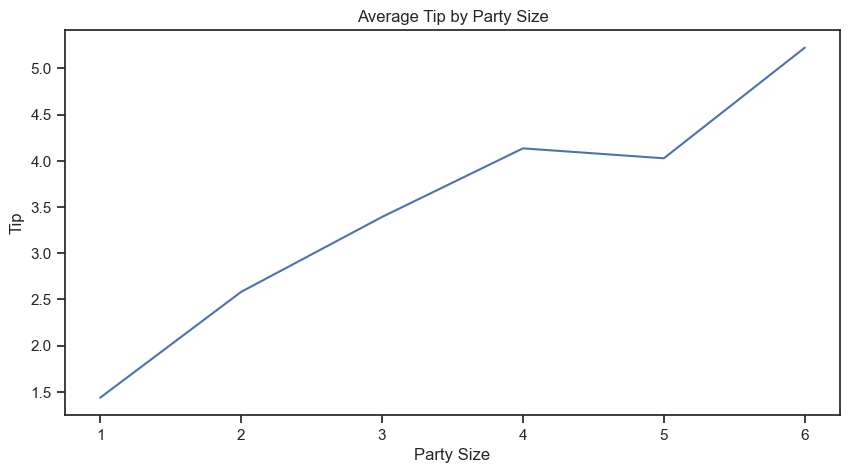

In [69]:
# Line plot: Average tips by party size
plt.figure(figsize=(10, 5))
sns.lineplot(data=tips, x="size", y="tip", ci=None)
plt.title("Average Tip by Party Size")
plt.xlabel("Party Size")
plt.ylabel("Tip")
plt.show()

# Facet Grids - Creating Small Multiples

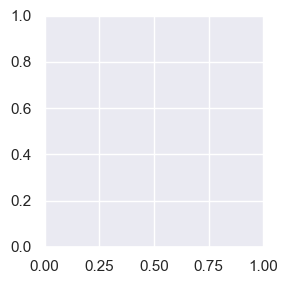

In [32]:
p = sns.FacetGrid(df)  # p is the facet grid
plt.show()

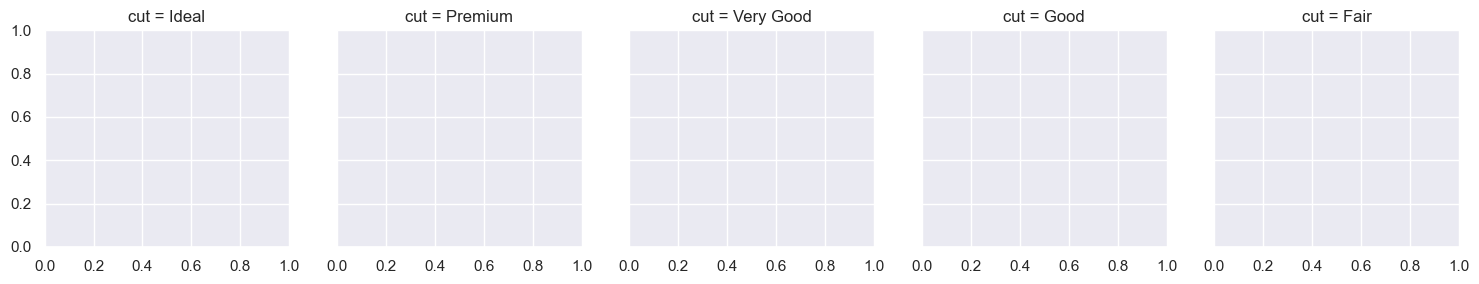

In [33]:
p = sns.FacetGrid(df, col="cut")  # 1 column for each facet (value) of cut.
plt.show()

# matplotlib will squeeze the 5 plots into the orginal size.

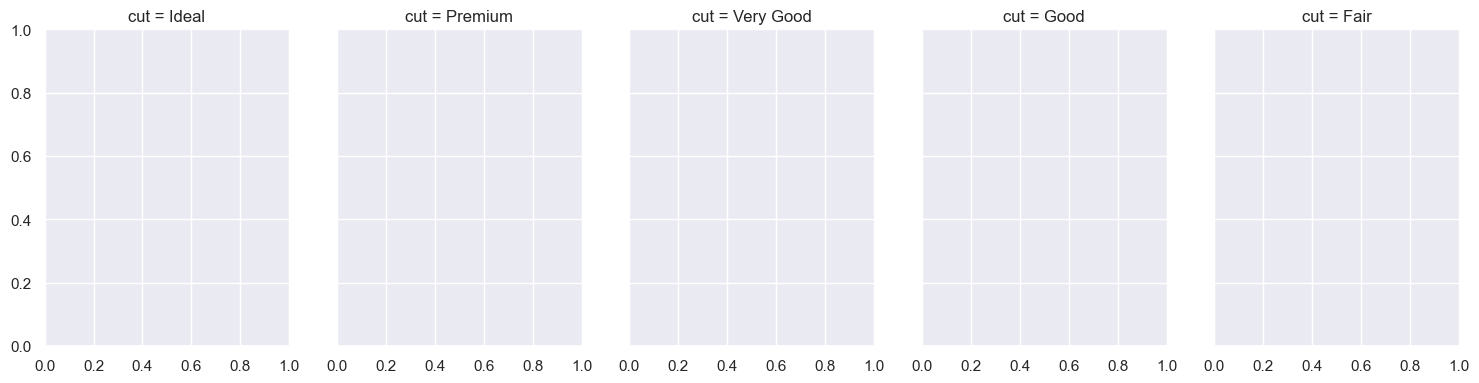

In [34]:
p = sns.FacetGrid(df, col="cut", height=4, aspect=0.75)
plt.show()
# Aspect ratio of each facet, so that aspect * height gives the width of each facet.

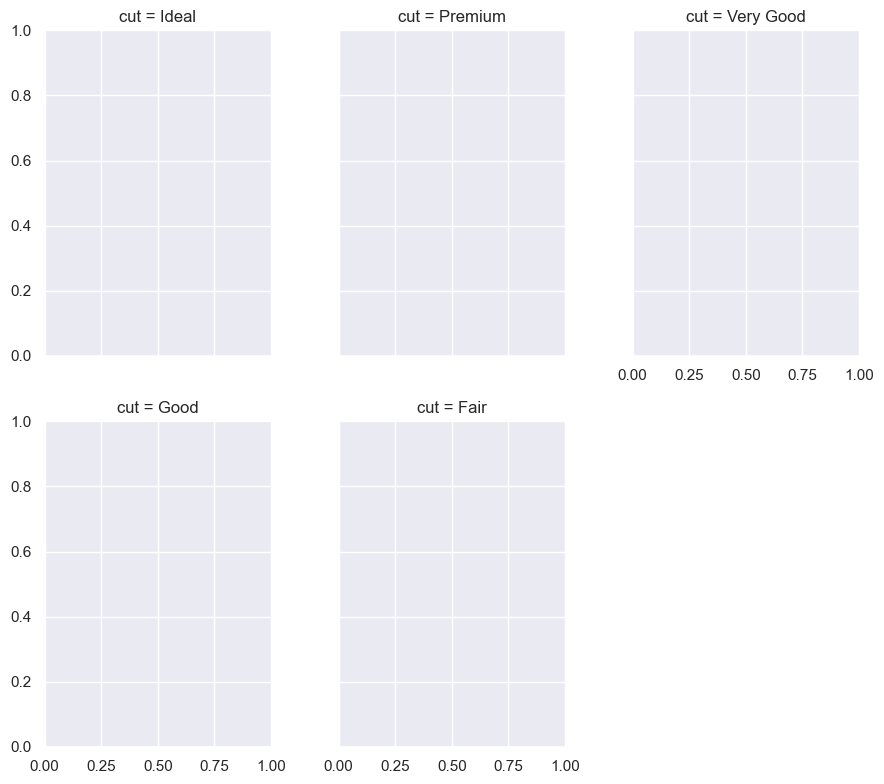

In [35]:
p = sns.FacetGrid(df, col="cut", height=4, aspect=0.75, col_wrap=3)
plt.show()
# Aspect ratio of each facet, so that aspect * height gives the width of each facet.

In [36]:
sns.set_style("white")
penguins = sns.load_dataset("penguins")

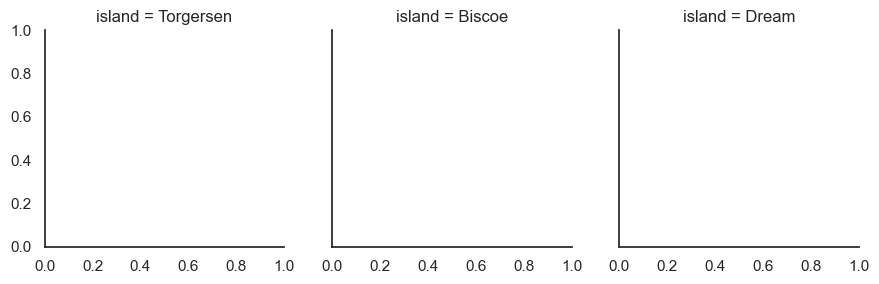

In [37]:
p = sns.FacetGrid(penguins, col="island")
plt.show()

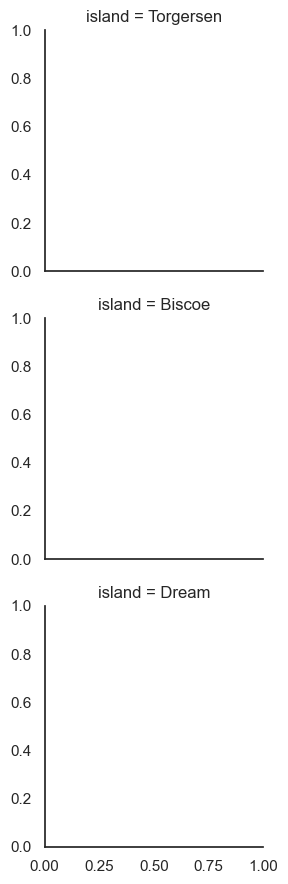

In [38]:
p = sns.FacetGrid(penguins, row="island")
plt.show()

In [39]:
type(p)

seaborn.axisgrid.FacetGrid

## Managing the Facet Grid

In [40]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


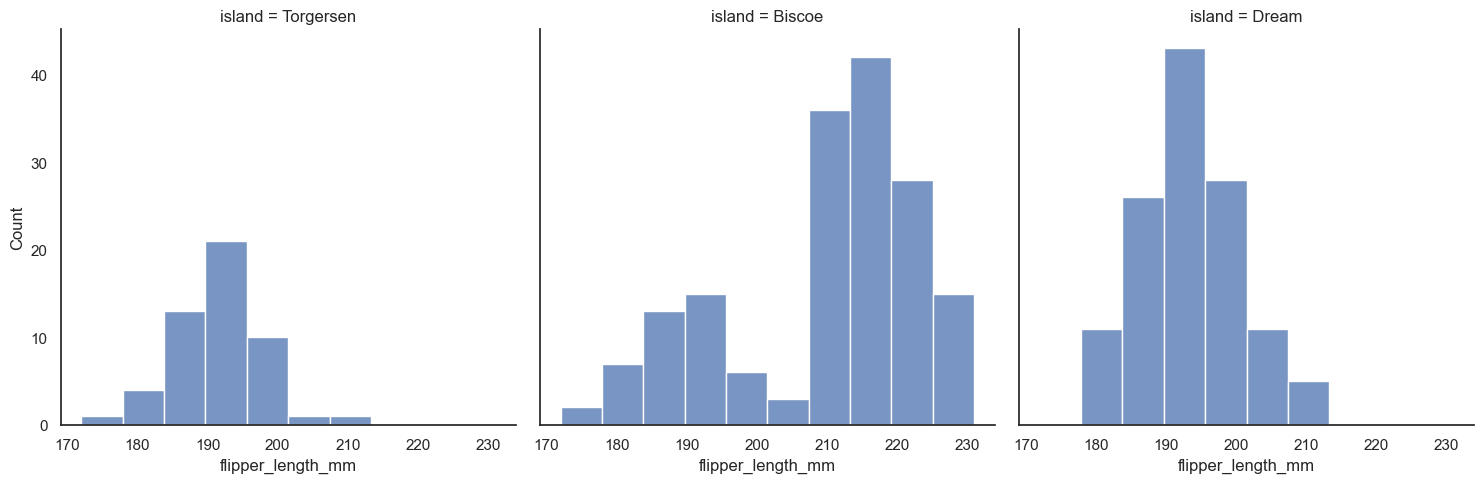

In [41]:
sns.displot(data=penguins, x="flipper_length_mm", col="island", kind="hist")
plt.show()

## Using methods of FacetGrid

These will be used when an axes level plot is used.

Three steps:
- set up the FacetGrid
- identify the plot type using .map or .map_dataframe
- customize

### .map()
1. Set up the facet grid (format the facets)
2. Describe what should be plotted in the grids
3. Add extras - labels, titles, etc.

To draw a plot on every facet, pass a function and the name of one or more columns in the dataframe to FacetGrid.map()

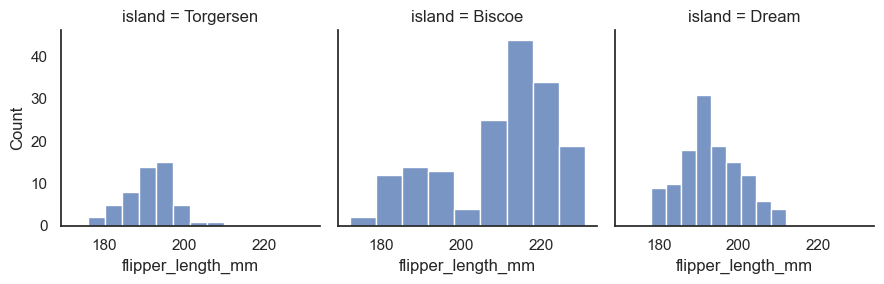

In [42]:
p = sns.FacetGrid(penguins, col="island")
p.map(sns.histplot, "flipper_length_mm")
# Requires positional arguements, not named (x = 'flipper_length_mm')
plt.show()

### .map_dataframe()

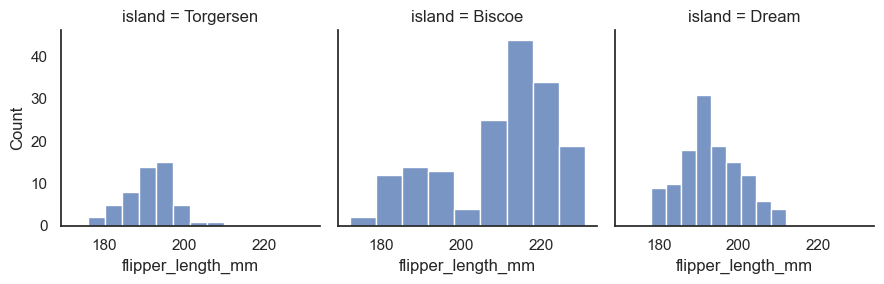

In [43]:
p = sns.FacetGrid(penguins, col="island")
p.map_dataframe(sns.histplot, x="flipper_length_mm")
# It is the x= that is different.  This is the named arguement
plt.show()

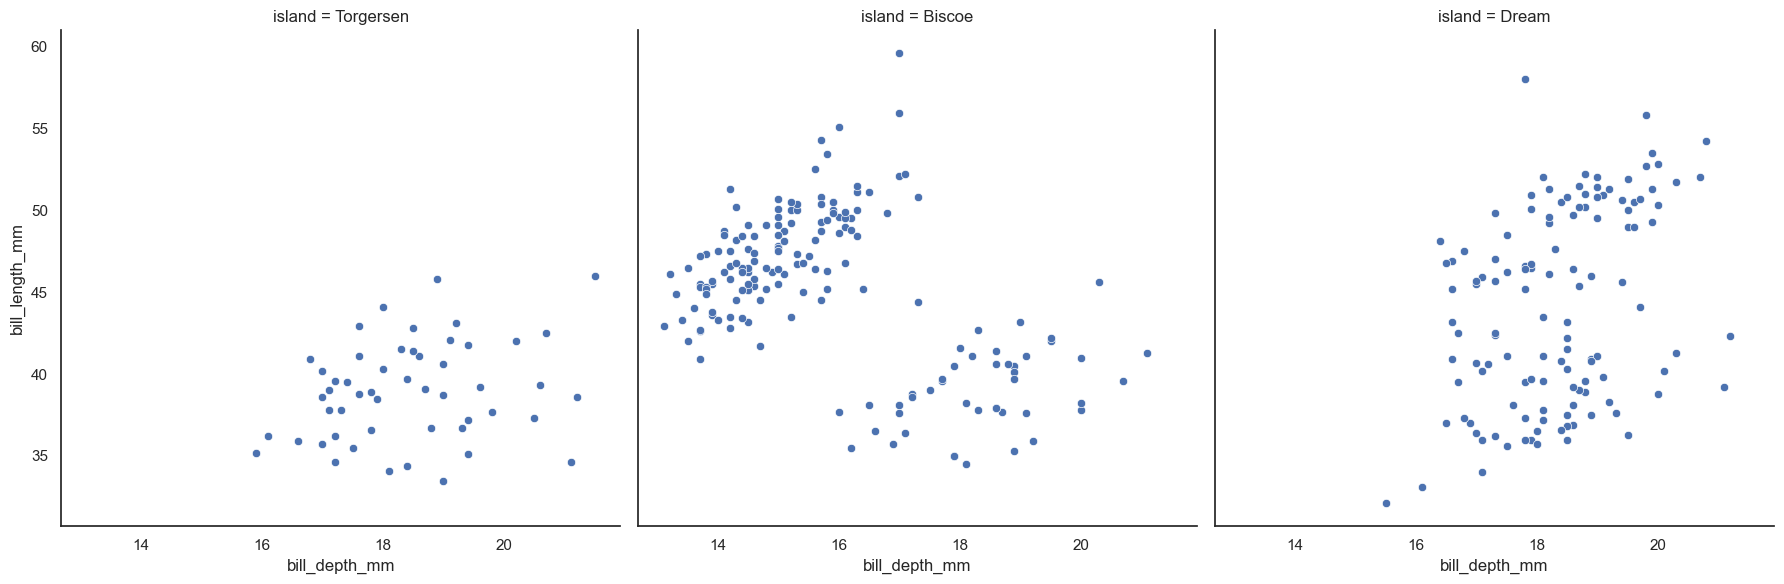

In [44]:
p = sns.FacetGrid(penguins, col="island", height=6, aspect=1)
p.map_dataframe(sns.scatterplot, y="bill_length_mm", x="bill_depth_mm")
plt.show()

### .set_axis_labels(),    .set_titles(),    sharey,    ylim

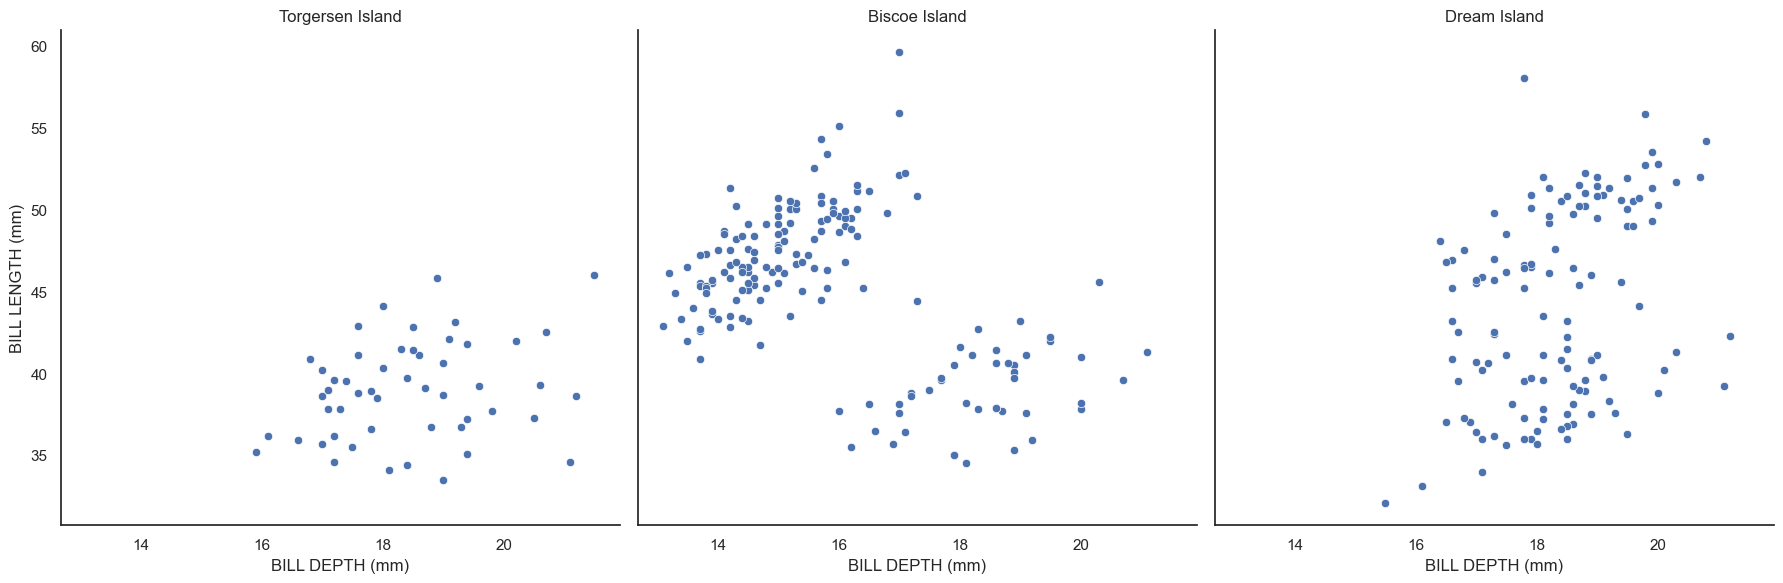

In [45]:
p = sns.FacetGrid(penguins, col="island", height=6, aspect=1)
p.map_dataframe(sns.scatterplot, x="bill_depth_mm", y="bill_length_mm")

p.set_axis_labels("BILL DEPTH (mm)", "BILL LENGTH (mm)")
# if the LABELS needs to be changed
p.set_titles(col_template="{col_name} Island")
# if the TITLE needs to be changed
plt.show()

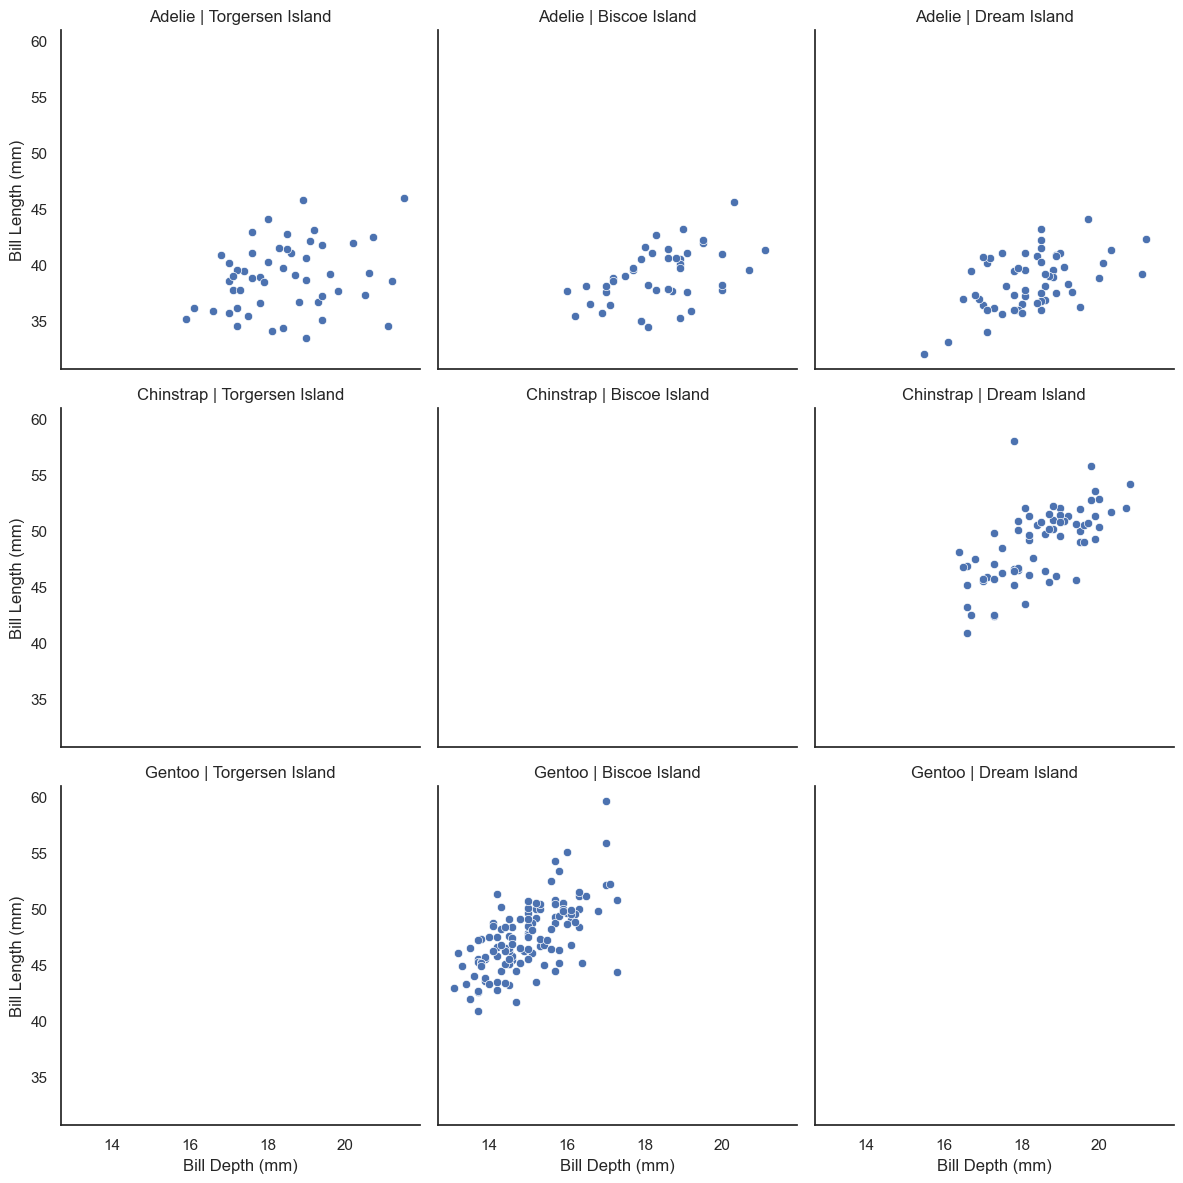

In [46]:
p = sns.FacetGrid(penguins, col="island", row="species", height=4, aspect=1)
p.map_dataframe(sns.scatterplot, x="bill_depth_mm", y="bill_length_mm")
p.set_axis_labels("Bill Depth (mm)", "Bill Length (mm)")
p.set_titles(row_template="{row_name}", col_template="{col_name} Island")
plt.show()

- sharey: False means the y-axis will not be shared and each plot will get its own y-axis.
- ylim: Sets a specified range for all y-axes shown

#### sharey = False

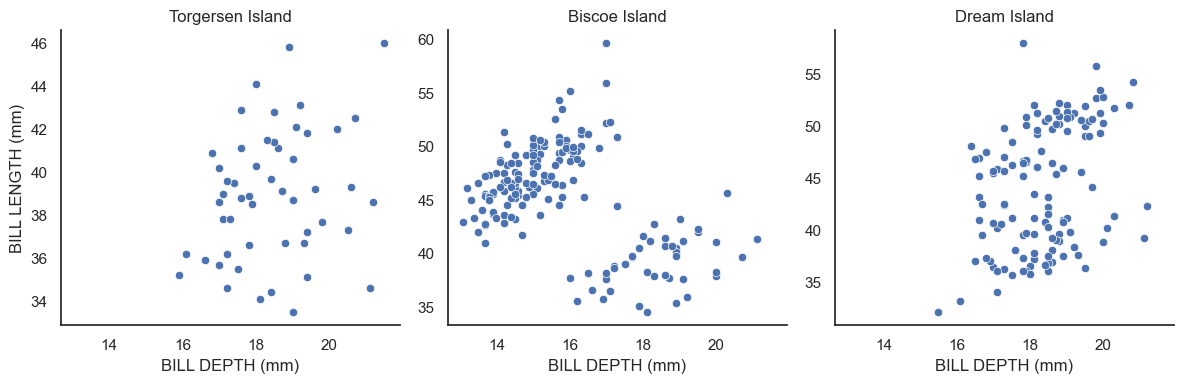

In [47]:
p = sns.FacetGrid(penguins, col="island", height=4, aspect=1, sharey=False)

# p = sns.FacetGrid(penguins, col='island', height = 4, aspect =1, sharey=False, ylim=(20, 70))

p.map_dataframe(sns.scatterplot, x="bill_depth_mm", y="bill_length_mm")
p.set_axis_labels("BILL DEPTH (mm)", "BILL LENGTH (mm)")
p.set_titles(col_template="{col_name} Island")
plt.show()

### hue & pallette

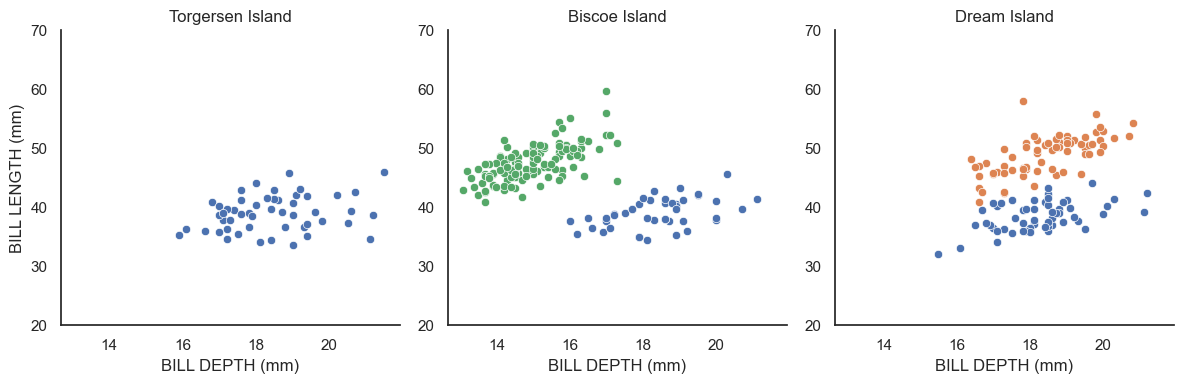

In [48]:
p = sns.FacetGrid(
    penguins,
    col="island",
    height=4,
    aspect=1,
    sharey=False,
    ylim=(20, 70),
    hue="species",
)
p.map_dataframe(sns.scatterplot, x="bill_depth_mm", y="bill_length_mm")
p.set_axis_labels("BILL DEPTH (mm)", "BILL LENGTH (mm)")
p.set_titles(col_template="{col_name} Island")
plt.show()

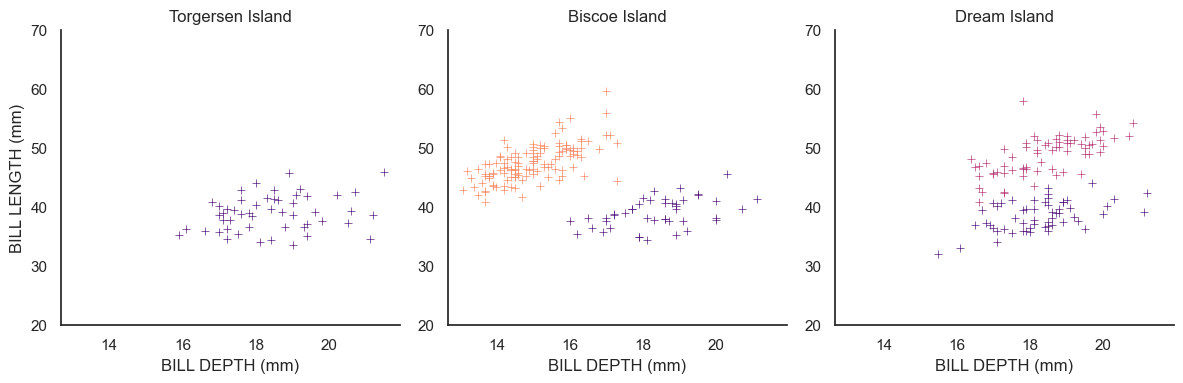

In [49]:
p = sns.FacetGrid(
    penguins,
    col="island",
    height=4,
    aspect=1,
    sharey=False,
    ylim=(20, 70),
    hue="species",
    palette="magma",
    # palette = ['grey','blue','red']
)

p.map_dataframe(sns.scatterplot, x="bill_depth_mm", y="bill_length_mm", marker="+")
p.set_axis_labels("BILL DEPTH (mm)", "BILL LENGTH (mm)")
p.set_titles(col_template="{col_name} Island")
plt.show()

### Accomplish the same without defining the facet grid first

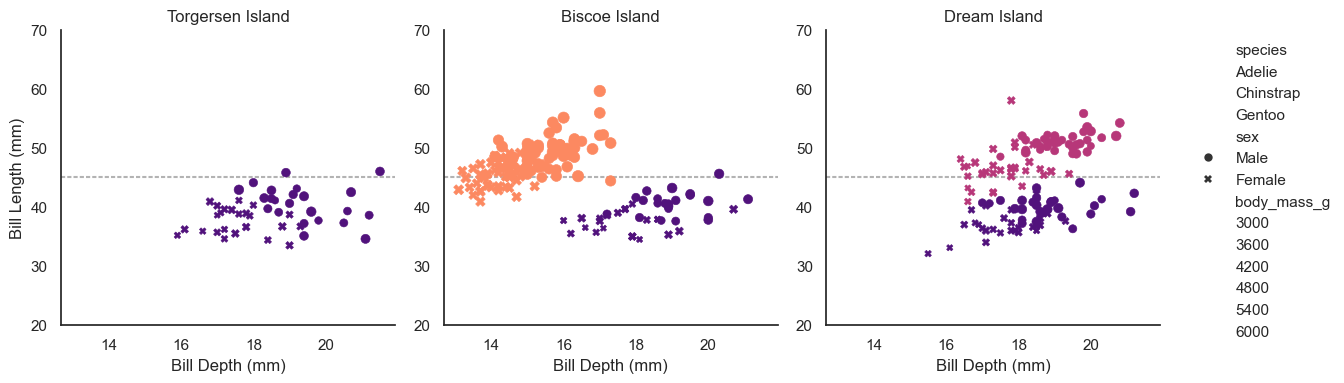

In [50]:
p = sns.relplot(
    data=penguins,
    x="bill_depth_mm",
    y="bill_length_mm",
    kind="scatter",
    col="island",
    height=4,
    aspect=1,
    hue="species",
    palette="magma",
    marker="+",
    size="body_mass_g",
    style="sex",
    facet_kws={"sharey": False, "sharex": True, "ylim": (20, 70)},
    #   sharey=False, ylim=(20, 70), #palette = ['grey','blue','red']
)

p.map(plt.axhline, y=45, color=".7", dashes=(2, 1), zorder=0)
p.set_axis_labels("Bill Depth (mm)", "Bill Length (mm)")
p.set_titles(row_template="{row_name}", col_template="{col_name} Island")
plt.show()

### Method Chaining

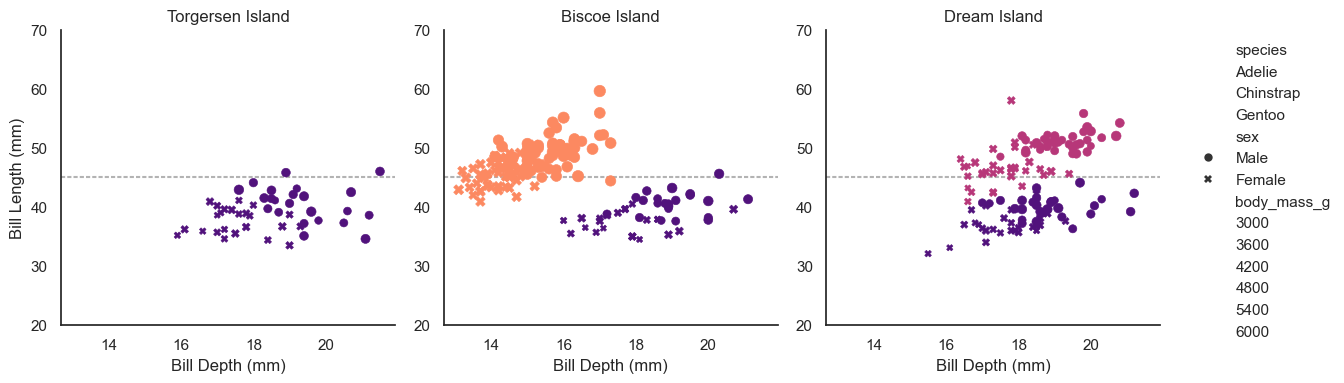

In [51]:
p = sns.relplot(
    data=penguins,
    x="bill_depth_mm",
    y="bill_length_mm",
    kind="scatter",
    col="island",
    height=4,
    aspect=1,
    hue="species",
    palette="magma",
    marker="+",
    size="body_mass_g",
    style="sex",
    facet_kws={"sharey": False, "sharex": True, "ylim": (20, 70)},
)

(
    p.map(plt.axhline, y=45, color=".7", dashes=(2, 1), zorder=0)
    .set_axis_labels("Bill Depth (mm)", "Bill Length (mm)")
    .set_titles(row_template="{row_name}", col_template="{col_name} Island")
)
plt.show()

## Seaborn Exercise 2 - 10 minutes

Using the flights info, create a visualization that plots - for each month - the number of passengers by year.  
There should be one plot per month.

In [52]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [53]:
flights.head(20)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


In [54]:
flights.shape

(144, 3)

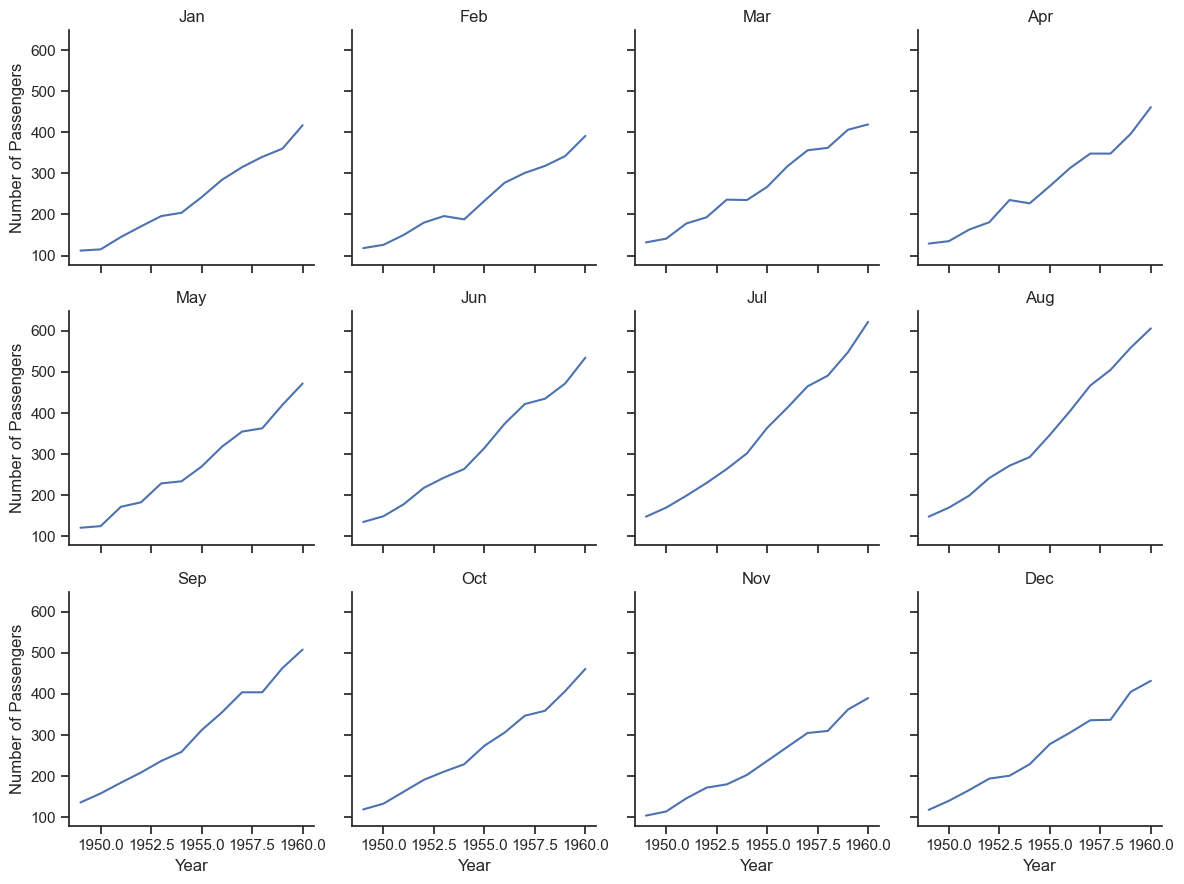

In [ ]:
# SNS Exercise 2 solution here.
import seaborn as sns
import matplotlib.pyplot as plt

# Load the example flights dataset
flights = sns.load_dataset("flights")

# Create a FacetGrid for each month, showing the number of passengers by year
g = sns.FacetGrid(flights, col="month", col_wrap=4, height=3)
g.map(sns.lineplot, "year", "passengers")

# Add titles and adjust layout
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Number of Passengers")
plt.tight_layout()
plt.show()

## Seaborn Exercise 3 - 15 minutes

The distplot below is quick 'one-liner' plot.
Take a little more time to create an axes for each cut and the axes are one above the other.

<img src="https://drive.google.com/uc?id=1SpS1UGerqF5snj0Y7p3lkxtOYSiAgdXz" width=1200 />


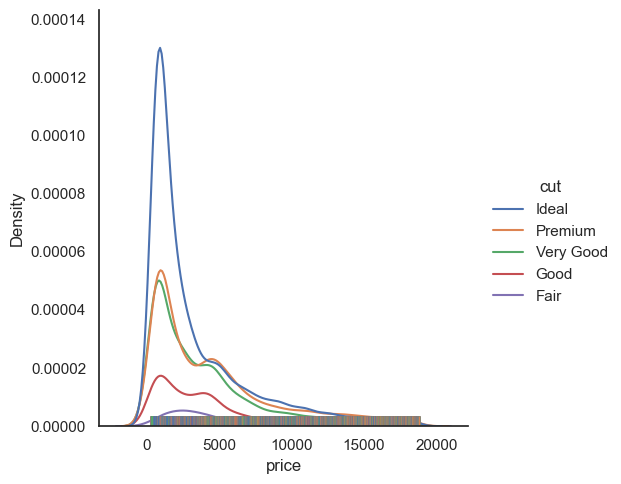

In [56]:
# This is the chart on the left with diamond data.
sns.displot(data=df, x="price", hue="cut", kind="kde", rug=True)
plt.show()

In [57]:
# Place Exercise 3 solution here.

# https://towardsdatascience.com/sorry-but-sns-distplot-just-isnt-good-enough-this-is-though-ef2ddbf28078
df = sns.load_dataset("diamonds")

# Multiple Views

## Jointplot

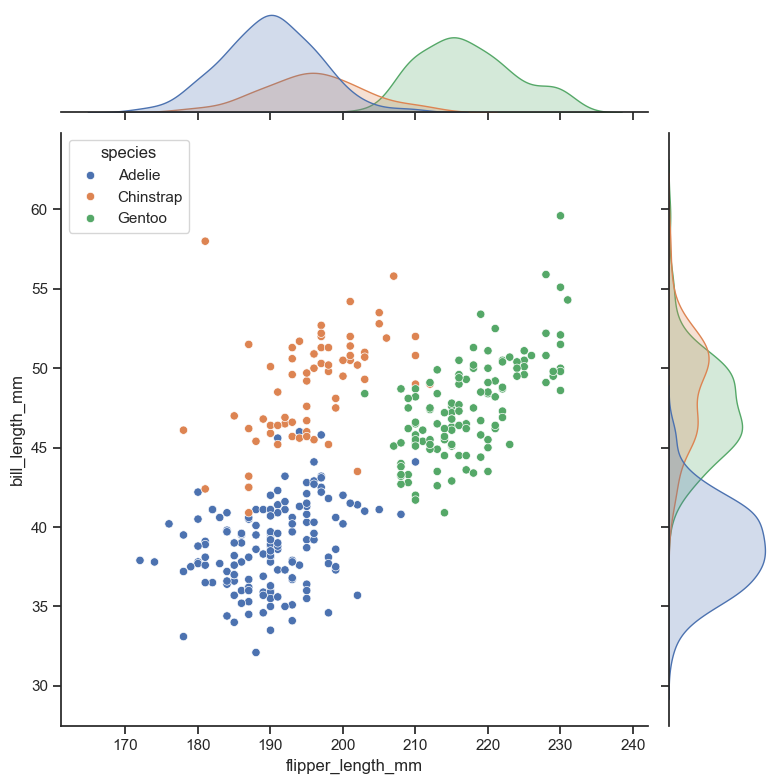

In [58]:
sns.set_style("ticks")
sns.jointplot(
    data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", height=8
)
plt.show()

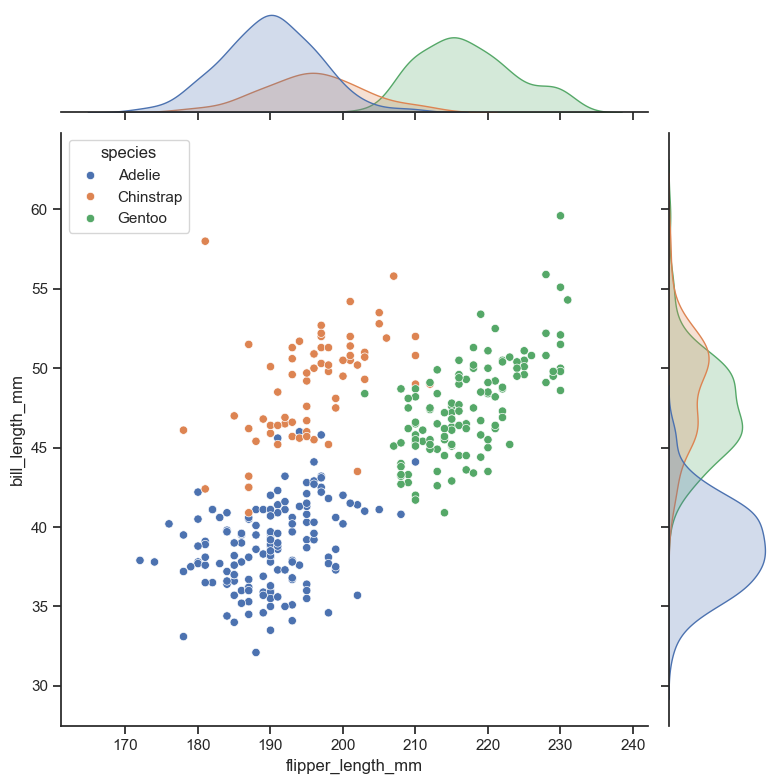

In [59]:
sns.set_style("ticks")
sns.jointplot(
    data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", height=8
)
plt.show()

## Pairplot

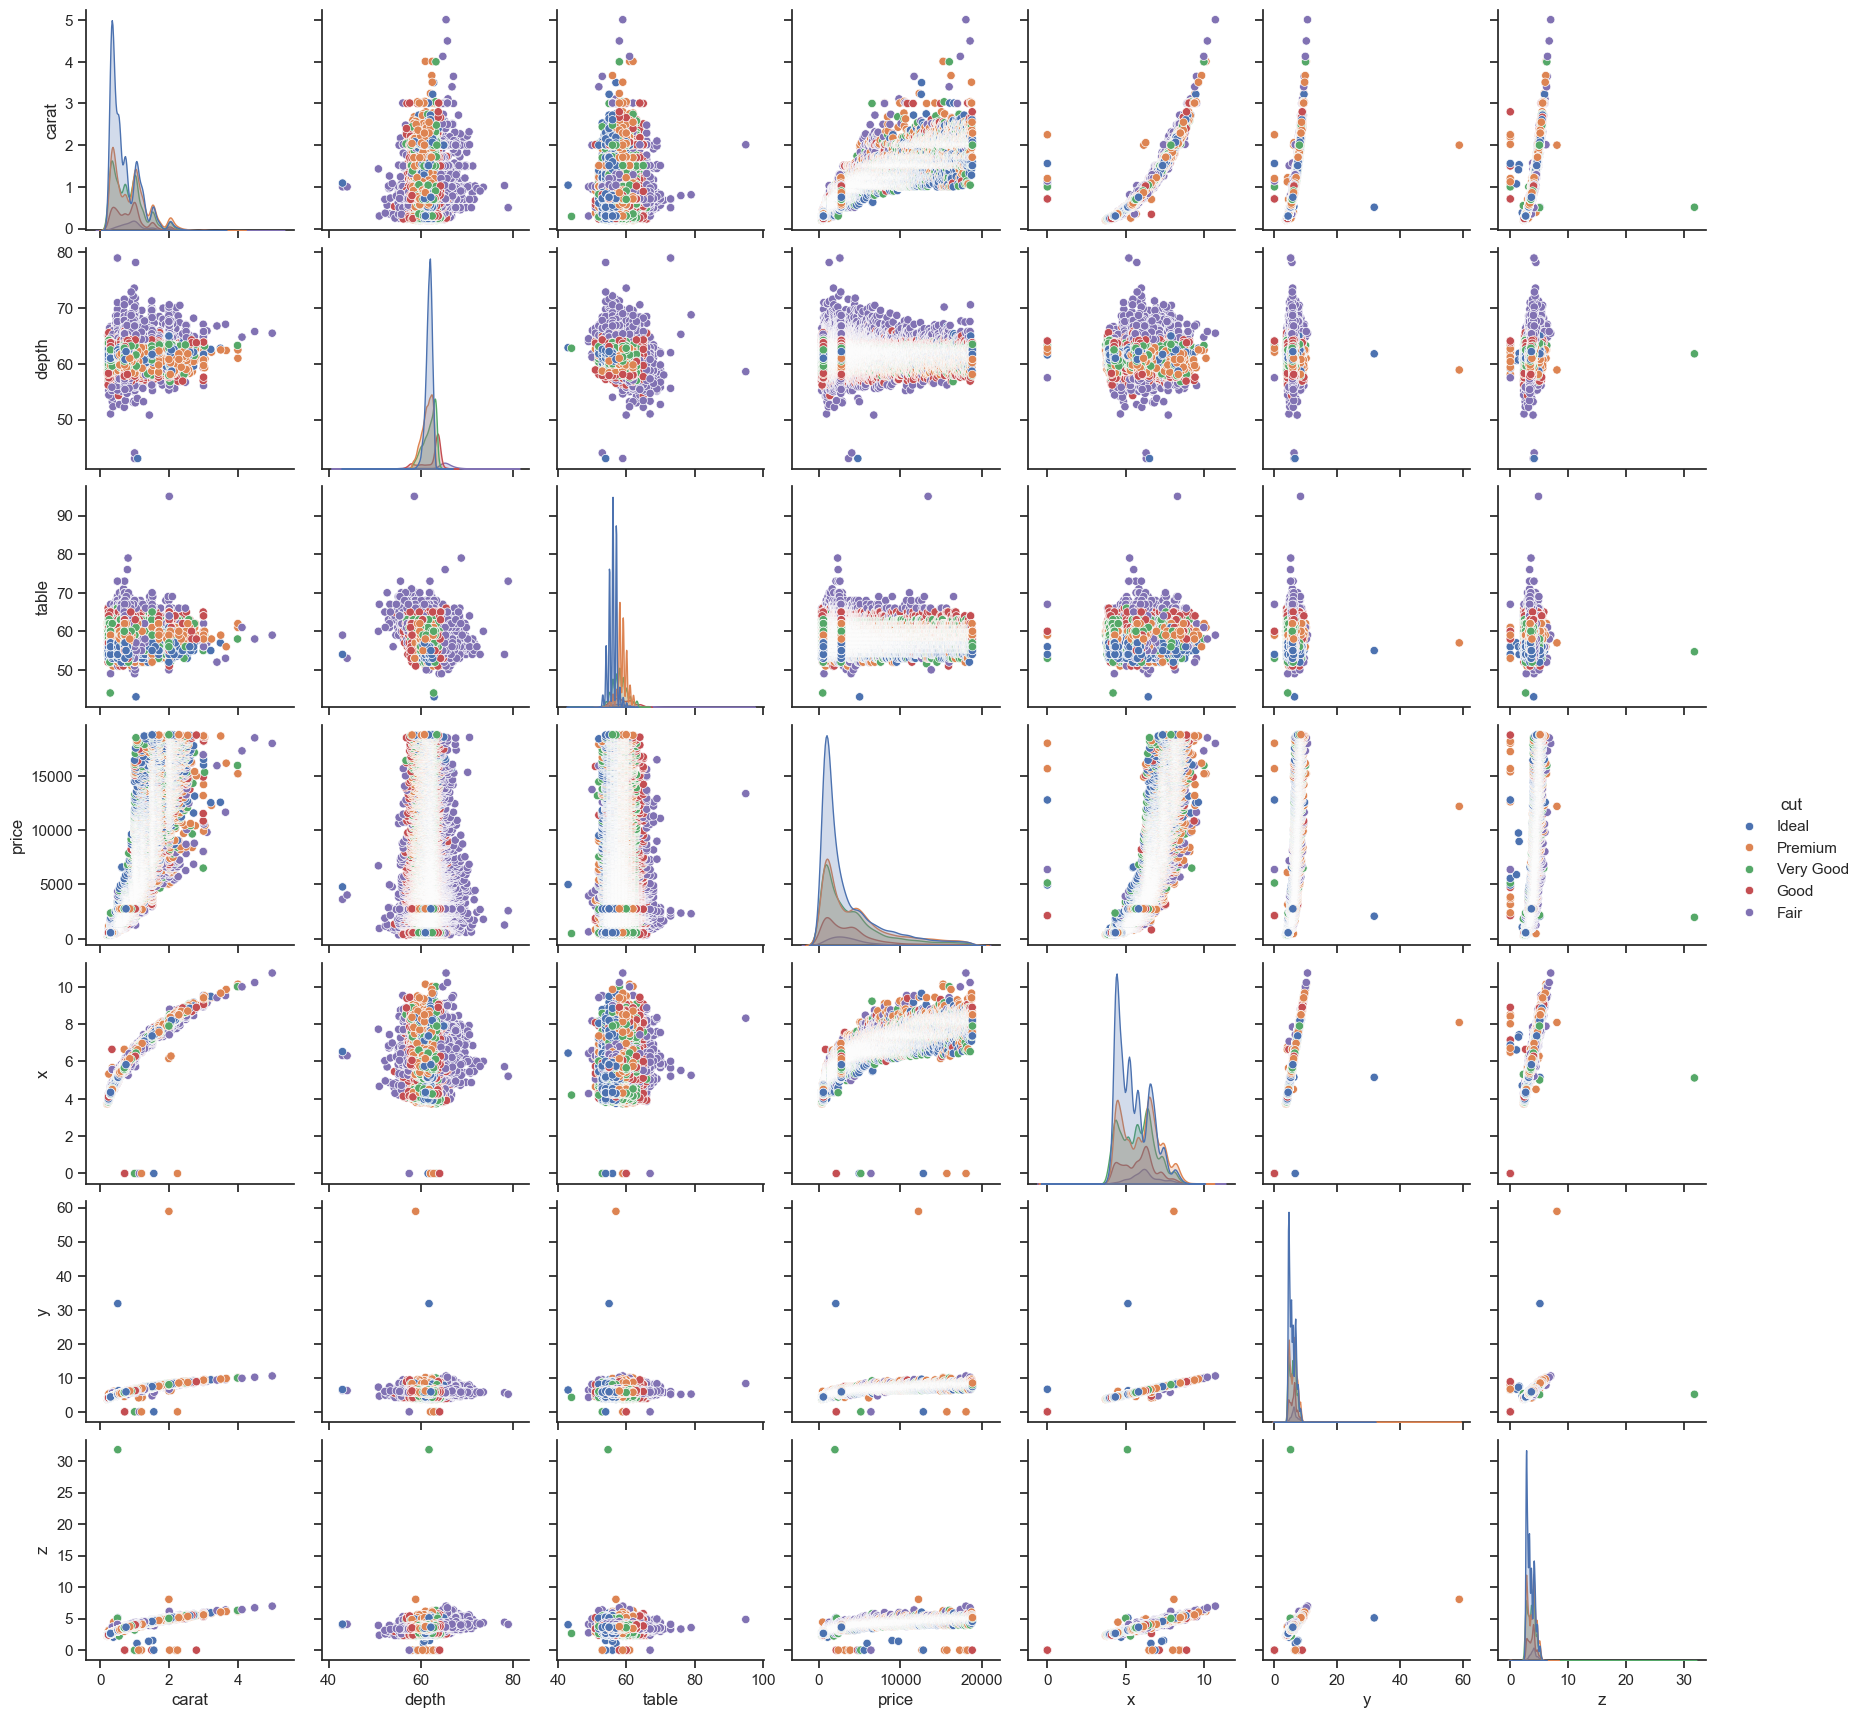

In [60]:
sns.pairplot(data=df, hue="cut")
plt.show()

In [61]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [62]:
numeric_data = df.select_dtypes(include="number")
xyz = numeric_data.corr()
xyz

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


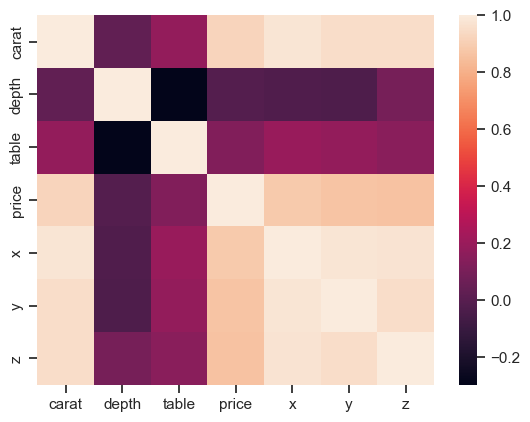

In [63]:
sns.heatmap(xyz, annot=False)
plt.show()

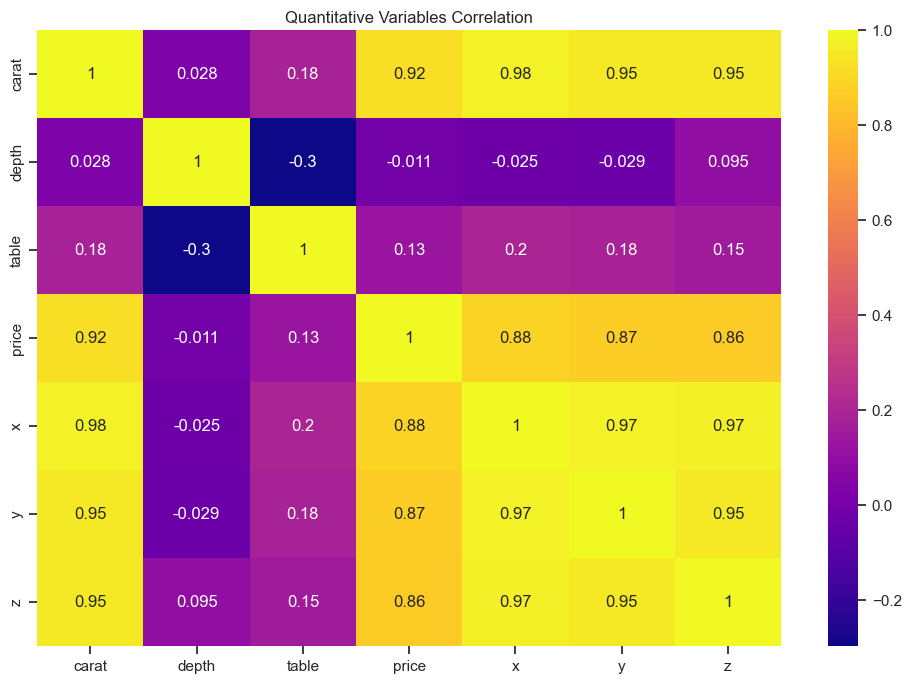

In [64]:
# Calculate correlations
# corr = df.corr()
plt.figure(figsize=(12, 8))
plt.title("Quantitative Variables Correlation")

# Heatmap
sns.heatmap(xyz, cmap="plasma", annot=True)
plt.show()

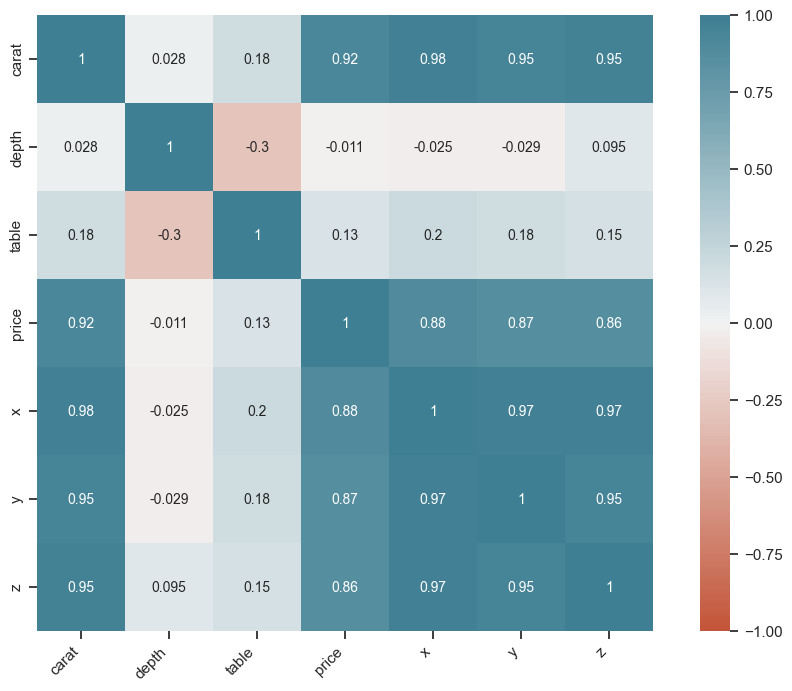

In [65]:
plt.figure(figsize=(12, 8))
# corr = df.corr()
ax = sns.heatmap(
    xyz,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    annot_kws={"size": 10},
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.show()

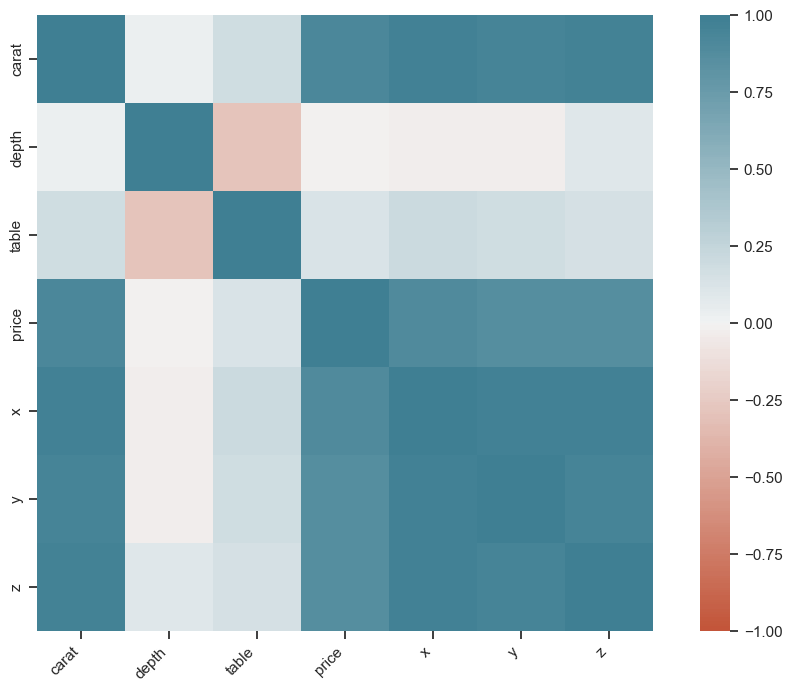

In [66]:
plt.figure(figsize=(12, 8))
# corr = df.corr()
ax = sns.heatmap(
    xyz,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=False,
    annot_kws={"size": 20},
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.show()